In [1]:
import sys
sys.path.append("..")
from c3s_511_trends import TrendLims1D

# Example A: Reading in station data, resampling and plotting


Loaded datafile ../test_data/ehdb_t2m.nc
Resampled to Y frequency
Creating a plot with label: T2m


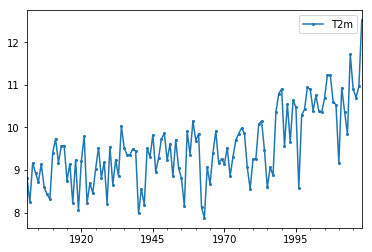

In [2]:
mydat = TrendLims1D('De Bilt T2m')
mydat.load_file('../test_data/ehdb_t2m.nc')
mydat.resample('Y')
mydat.plot('T2m')

# Example B1: Creating artificial data and breakpoint detection

Created an artificial timeseries
Calculated Mann-Kendall test
Calculated linear trend test
Calculated Theil-Sen slope
Resampled to Y frequency
Creating a plot with label: Test data
This timeseries is marked as Suspect (value based)


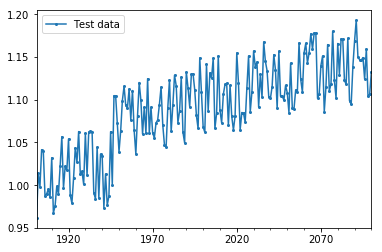

In [3]:
mydat = TrendLims1D('artificial_timeseries')
mydat.create_artificial({'periods' : 200, 'jump_start' : 46, 'jump_length': 200,'jump_magnitude' : 0.05, 'trend_magnitude' : 0.005})
mydat.do_trends()
mydat.resample('Y') # Resample to yearly resolution
mydat.plot(label='Test data')
mydat.detect_breakpoints()

# Example B2: How breakpoint detection is affected by removal of the linear trend

In [4]:
mydat = TrendLims1D('artificial_timeseries')
print("Creating test data with no jump")
noise_magnitude = 0.05
mydat.create_artificial({'periods' : 200, 'jump_start' : 46, 'jump_length': 200,'jump_magnitude' : 0.0*noise_magnitude, 'trend_magnitude' : 0.1*noise_magnitude, 'noise' : noise_magnitude})
mydat.resample('Y')
mydat.detect_breakpoints()
print("Now removing the trend through subtracting the linear trend.")
mydat.do_trends()
mydat.remove_trend('linear')
mydat.detect_breakpoints()

Creating test data with no jump
Created an artificial timeseries
Resampled to Y frequency
This timeseries is marked as Suspect (value based)
Now removing the trend through subtracting the linear trend.
Calculated Mann-Kendall test
Calculated linear trend test
Calculated Theil-Sen slope
This timeseries is marked as Useful (value based)


# Example B3:  Breakpoint detection on difference values ("variance")

Loaded datafile ../test_data/ehdb_t2m.nc
Subsetted to timeperiod 1950-01-01-2017-12-31
Resampled to Y frequency
This timeseries is marked as Useful (value based)
Creating a plot with label: None


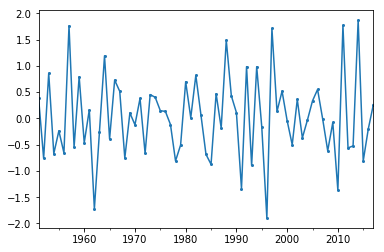

In [5]:
mydat = TrendLims1D('De Bilt T2m')
mydat.load_file('../test_data/ehdb_t2m.nc')
# Detect breakpoints
mydat.subset(slice('1950-01-01','2017-12-31'))
mydat.resample('Y')
mydat.remove_trend(method='differences')
mydat.detect_breakpoints()
mydat.plot()

## Example B4:  Breakpoint detection on a detrended dataset ("variance")

Loaded datafile ../test_data/ehdb_t2m.nc
Resampled to Y frequency
Subsetted to timeperiod 1910-2017
Calculated Mann-Kendall test
Calculated linear trend test
Calculated Theil-Sen slope
Creating a plot with label: None


/net/exo/landclim/crezees/conda/envs/trends/lib/python3.6/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


This timeseries is marked as Doubtful (value based)


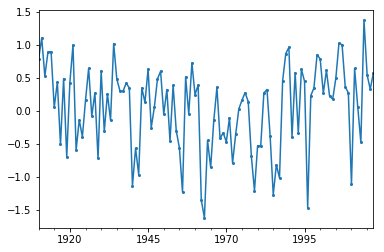

In [6]:
mydat = TrendLims1D('De Bilt')
mydat.load_file('../test_data/ehdb_t2m.nc')
mydat.resample('Y')
mydat.subset(slice('1910','2017'))
mydat.do_trends()
mydat.remove_trend('theilsen')
mydat.plot()
mydat.detect_breakpoints()

## Example C1: Trend analysis on >100 years of data

Loaded datafile ../test_data/ehdb_t2m.nc
Resampled to Y frequency
Creating a plot with label: None
Calculated Mann-Kendall test
Calculated linear trend test
Calculated Theil-Sen slope


/net/exo/landclim/crezees/conda/envs/trends/lib/python3.6/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


,method,sign,slope [Celsius/decade],slope [percent/decade],pvalue
0,mk,1,NaN,NaN,1.609823e-13
1,linear,1,0.169654,0.017840,1.779655e-16
2,theilsen,1,0.166948,0.017556,NaN


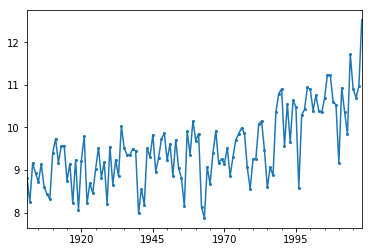

In [7]:
mydat = TrendLims1D('De Bilt')
mydat.load_file('../test_data/ehdb_t2m.nc')
mydat.resample('Y')
mydat.plot()
mydat.do_trends()
mydat.trends

## Example C2: Trend analysis on 30 years - Robustness of Theil-Sen estimator explains difference

Resampled to Y frequency
Subsetted to timeperiod 1987-2018
Creating a plot with label: None
Calculated Mann-Kendall test
Calculated linear trend test
Calculated Theil-Sen slope


/net/exo/landclim/crezees/conda/envs/trends/lib/python3.6/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


,method,sign,slope [Celsius/decade],slope [percent/decade],pvalue
0,mk,1,NaN,NaN,0.024191
1,linear,1,0.362820,0.038153,0.010888
2,theilsen,1,0.246964,0.025970,NaN


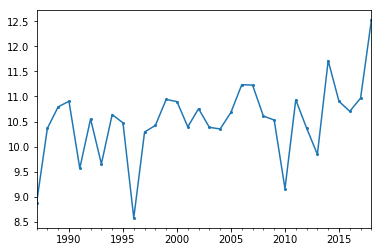

In [8]:
mydat.reset()
mydat.resample('Y')
mydat.subset(slice('1987','2018'))
mydat.plot()
mydat.do_trends()
mydat.trends

## Example D: Analyse the residuals after subtracting a certain trend

Resampled to Y frequency
Subsetted to timeperiod 1910-2017
Creating a plot with label: original


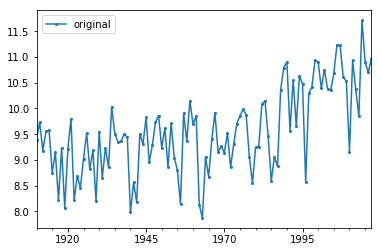

Calculated Mann-Kendall test
Calculated linear trend test
Calculated Theil-Sen slope
Creating a plot with label: detrended


/net/exo/landclim/crezees/conda/envs/trends/lib/python3.6/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


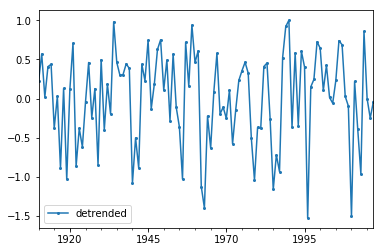

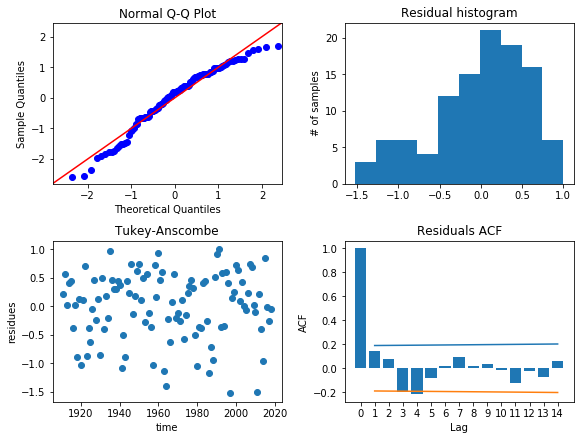

In [9]:
import matplotlib.pyplot as plt
mydat.reset()
mydat.resample('Y')
mydat.subset(slice('1910','2017'))
mydat.plot('original')
plt.show()
mydat.do_trends()
mydat.remove_trend(method='polynomial')
mydat.plot('detrended')
plt.show()
mydat.do_residual_analysis()
#mydat.do_residual_analysis('linear')
pass # dummy statement for preventing image showing up twice

In [10]:
mydat.detect_breakpoints()
mydat.breakpoints

This timeseries is marked as Useful (value based)


,method,estimate,estimate_formatted,p.value
0,Standard Normal Homogeneity Test (SNHT),100.0,2010-12-31,0.969100
1,Pettitt's test for single change-point detection,78.0,1988-12-31,0.828957
2,Buishand range test,78.0,1988-12-31,0.464050
3,Bartels's test for randomness,NaN,NaT,0.054545


## Example E: Apply the concept of minimal detectable trends

In [11]:
mydat.reset()
mydat.weatherhead_framework(trend_magnitude=0.02) # Taken from GCOS table

Calculated Theil-Sen slope


/net/exo/landclim/crezees/conda/envs/trends/lib/python3.6/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


,trend_magnitude [/decade],std_res,acf_res,n_star,index
0,0.02,0.64661,0.251094,123.890557,0


## Example F: Apply BFAST algorithm (experimental)

In [12]:
mydat.reset()
mydat.subset(slice('1950','2017'))
mydat.resample('M')
result = mydat.apply_bfast()

Subsetted to timeperiod 1950-2017
Resampled to M frequency
A first implementation of BFAST


TypeError: 'rpy2.rinterface.RNULLType' object is not iterable

R object with classes: ('bfast',) mapped to:
<ListVector - Python:0x7f7bafe18c88 / R:0x559987ef4ae8>
[Floa..., List..., List..., Floa..., Floa..., Bool..., List...]
  Yt: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('ts',) mapped to:
<FloatVector - Python:0x7f7bafd51f88 / R:0x55998299e660>
[1.106452, 5.550000, 6.541935, 7.646667, ..., 13.676666, 13.341935, 7.263333, 4.880645]
R object with classes: ('bfast',) mapped to:
<ListVector - Python:0x7f7bafe18c88 / R:0x559987ef4ae8>
[Floa..., List..., List..., Floa..., Floa..., Bool..., List...]
R object with classes: ('bfast',) mapped to:
<ListVector - Python:0x7f7bafe18c88 / R:0x559987ef4ae8>
[Floa..., List..., List..., Floa..., Floa..., Bool..., List...]
  Magnitude: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f7bafc156c8 / R:0x5599817143e0>
[0.000000]
  Mags: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) ma